### Script designed to probe Research Question 1: 

- Are the behavioural channels are sensitive to the topic of discussion?
- And is the effect of topic influenced by couples’ satisfaction with the relationship, and how committed they believe each other to be to the relationship?

Hypotheses:

- H1: Compared to the casual discussion, couples will exhibit less coordination during the problem-oriented discussions.
- H2: Differences will be less pronounced for couples with greater relationship satisfaction and perceived partner commitment.

In [2]:
# Import relevant packages
import pandas as pd
from lmm_utils import *
from numpy.polynomial.legendre import legvander

# Load data
merged_crqa = pd.read_csv('merged_crqa_iaaft.csv') # Load CRQA data.
Oua_dta = pd.read_csv("Relationship_Qualities.csv") # Load concurrent OuA data here.

In [3]:
"""
Note, this block defines 4 dataframes for analysis:
        - merged_crqa: Retained window data for actual and pseudo pairs. 
        - merged_coll: Collapsed data for actual and pseudo pairs 
        - actual_crqa: Retained windowed data for actual pairs. 
        - actual_coll: Collapsed data for actual pairs.
"""

merged_crqa = merged_crqa[merged_crqa['couple'] != 37] # More than 5 std > mean

remove_couples = range(1, 38) # Remove couples who did not complete the casual discussion

merged_crqa = merged_crqa[~merged_crqa['couple'].isin(remove_couples)]

# Define Dependent Variables. 
dv_cols = [col for col in merged_crqa.columns if col.endswith(tuple(['REC', 'DET', 'MAXLINE', 'ENTROPY', 'LAM']))]

merged_coll = merged_crqa.groupby(['couple', 'trial', 'pair'])[dv_cols].mean().reset_index()

print("N(couples) = ", len(merged_coll['couple'].unique()))

# Define dataframes for actual pairs only. 
actual_crqa = merged_crqa[merged_crqa['pair'] == 'actual']
actual_coll = merged_coll[merged_coll['pair'] == 'actual']

actual_coll


N(couples) =  112


,couple,trial,pair,head_ed_vel_REC,head_ed_vel_DET,head_ed_vel_MAXLINE,head_ed_vel_ENTROPY,head_ed_vel_LAM,headRel_ed_vel_REC,headRel_ed_vel_DET,headRel_ed_vel_MAXLINE,headRel_ed_vel_ENTROPY,headRel_ed_vel_LAM,body_ed_vel_REC,body_ed_vel_DET,body_ed_vel_MAXLINE,body_ed_vel_ENTROPY,body_ed_vel_LAM
0,81,trial0,actual,8.849879,43.764034,34.333333,1.364759,0.570496,3.472802,20.458888,13.666667,0.863602,0.338270,3.195910,12.555792,7.333333,0.485339,0.322180
2,81,trial1,actual,10.992626,52.418376,36.923077,1.503467,0.621438,3.188175,18.208039,12.692308,0.757370,0.293248,3.697953,15.861567,10.461538,0.603690,0.250495
4,81,trial2,actual,7.290279,41.607154,29.923077,1.381469,0.513665,3.098794,17.595030,12.307692,0.792553,0.301730,2.657768,11.178962,8.153846,0.450068,0.219985
6,82,trial0,actual,9.122292,44.830753,30.777778,1.309856,0.601662,3.982674,24.978011,21.777778,1.076486,0.401252,2.543684,11.291334,6.000000,0.458155,0.192854
8,82,trial1,actual,14.581880,62.749204,53.250000,1.879263,0.754559,5.734725,32.981204,26.250000,1.214439,0.494742,4.900804,22.128516,13.666667,0.775266,0.378338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,198,trial1,actual,5.834758,32.815421,20.076923,1.091774,0.430537,2.380905,12.793200,8.076923,0.635532,0.185481,1.967992,7.229969,5.692308,0.328781,0.135795
662,198,trial2,actual,5.410473,30.262651,20.846154,1.007710,0.414280,1.840068,8.314454,6.000000,0.375946,0.114413,1.402240,4.101097,3.538462,0.224367,0.059835
664,199,trial0,actual,5.813929,32.431921,16.600000,1.047147,0.486823,2.810600,14.392430,8.800000,0.605435,0.311126,2.180246,9.755420,6.600000,0.482795,0.206656
666,199,trial1,actual,5.274265,31.245000,16.272727,0.902053,0.434913,2.995255,17.179060,13.636364,0.803682,0.326891,2.545295,11.542640,6.818182,0.467271,0.240094


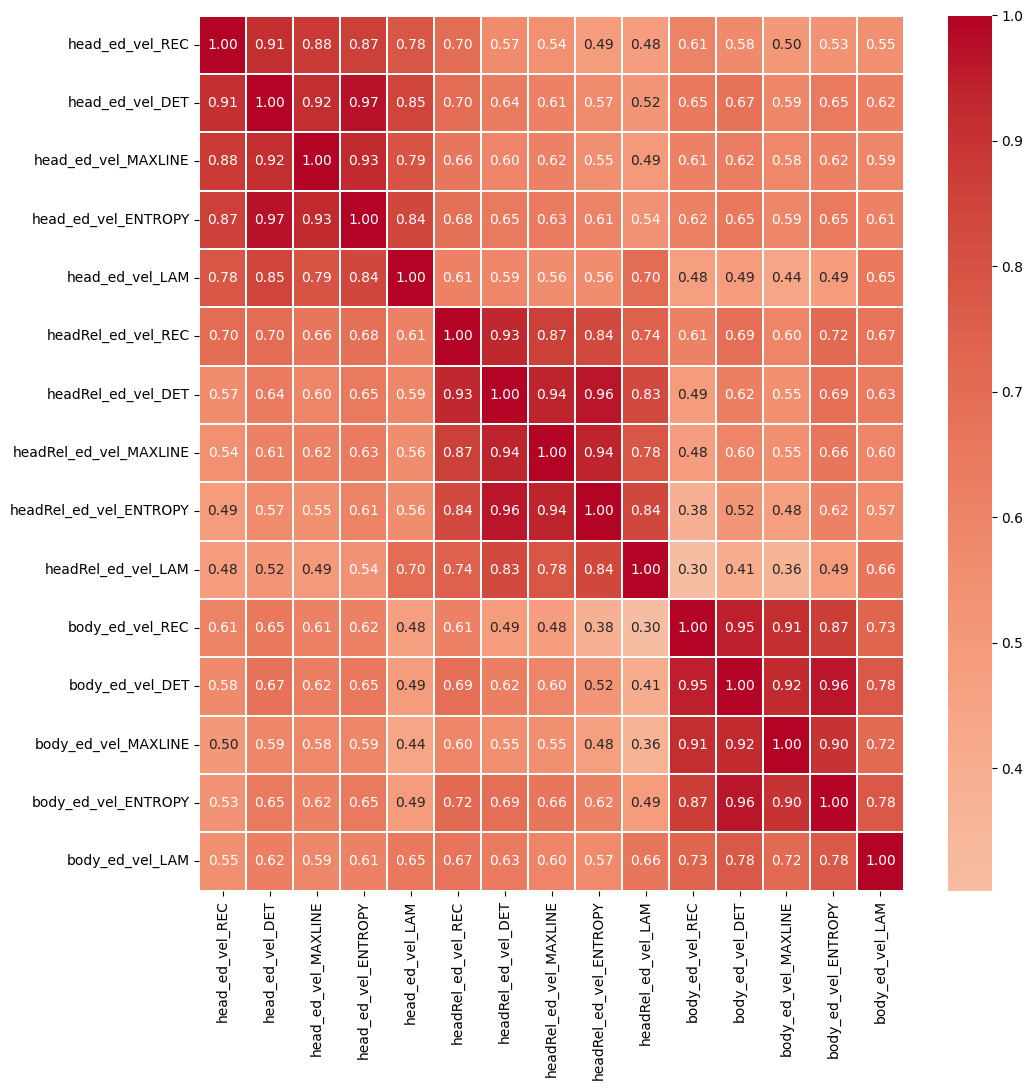

In [4]:
"""
Compute and visualise the correlation matrix for all behaviour-measure variables in your dataframe. 
 - First, select columns that match any of the specified behaviour prefixes and measure suffixes.
 - Then, calculate the Pearson correlation matrix for these variables.
 - Finally, plot the correlation matrix as a heatmap.
"""

# Select relevant columns
data = actual_coll[dv_cols]

# Compute correlation matrix
matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(11, 11))
sns.heatmap(matrix, annot=True, linewidths=0.01,fmt=".2f", cmap='coolwarm', center=0)

plt.tight_layout()
plt.show()

In [5]:
"""
Obtain Percieved Partner Commitment (PerCoMM) and Relationship Satisfation (SAT) from the OUTA dataset.
    - Both measures obtained from a Likert-type scale (1-7) reported by each partner before commencing the experiment.
    - Scores averaged across partners to obtain couple-level scores.  
"""

# Extract relevant columns (average perceived commitment and satisfaction)
avg_qual = Oua_dta[['couple', 'avg_percomm', 'avg_sat']]

# Remove any duplicate rows
avg_qual = avg_qual.drop_duplicates()


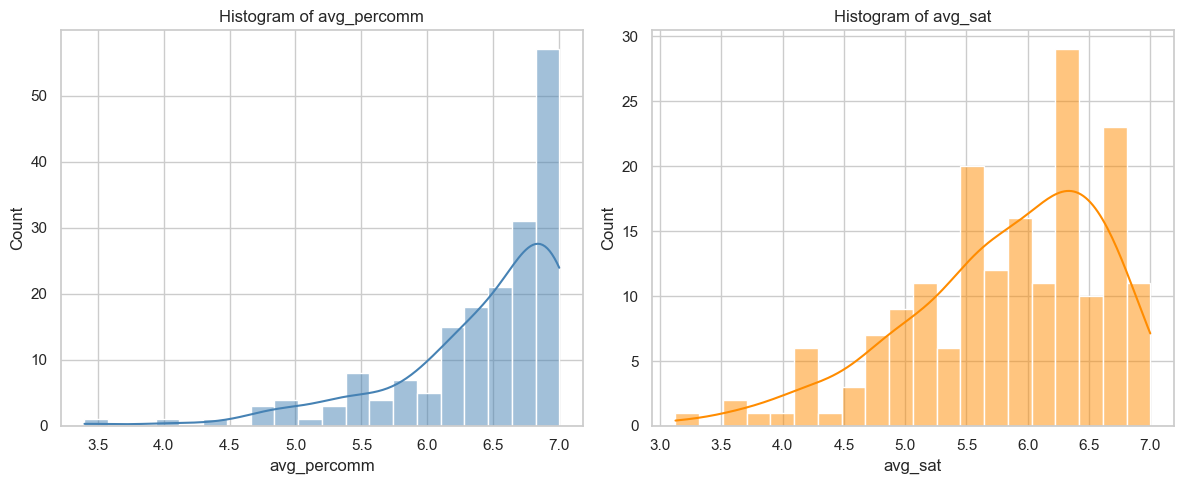

In [6]:
# Plot histograms for avg_percomm and avg_sat

# Set style
sns.set(style="whitegrid")

# Plot histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(avg_qual['avg_percomm'], bins=20, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Histogram of avg_percomm')
axes[0].set_xlabel('avg_percomm')

sns.histplot(avg_qual['avg_sat'], bins=20, kde=True, ax=axes[1], color='darkorange')
axes[1].set_title('Histogram of avg_sat')
axes[1].set_xlabel('avg_sat')

plt.tight_layout()
plt.show()

### Merge CRQA and relationship measures for analysis:

In [7]:
# Create copy of data for analysis
df = merged_coll.copy() # or actual_coll.copy(); merged_crqa.copy(); actual_crqa.copy()

win = False # Set to True if analysing windowed data.

if win:
    # Scale window_index within each (trial, pair)
    trial_windows = df.groupby(["trial", "pair"])["window_index"].unique()
    window_map = {}
    
    # unpack both trial and pair
    for (trial, pair), windows in trial_windows.items():
        min_win = windows.min()
        max_win = windows.max()
        window_map[(trial, pair)] = {
            w: (w - min_win) / (max_win - min_win) for w in windows
        }

    # apply the mapping to each row
    df["window_scaled"] = df.apply(
        lambda row: window_map[(row.trial, row.pair)][row.window_index],
        axis=1
    )


    # Center the scaled window variable around 0
    df["window_scaled_c"] = df["window_scaled"] - df["window_scaled"].mean()

    X = legvander(df['window_scaled'], deg=2)

    # add to dataframe
    df['ot1'] = X[:, 1]  # linear orthogonal component
    df['ot2'] = X[:, 2]  # quadratic orthogonal component


avg_qual = avg_qual.drop_duplicates(subset=['couple'])
# Merge with avg_qual to get avg_percomm and avg_sat
df = pd.merge(df, avg_qual, on=['couple'])

# Center avg_percomm and avg_sat
df['avg_percomm_c'] = df['avg_percomm'] - df['avg_percomm'].mean()
df['avg_sat_c'] = df['avg_sat'] - df['avg_sat'].mean()

# Create 2nd-order orthogonal polynomials
df


,couple,trial,pair,head_ed_vel_REC,head_ed_vel_DET,head_ed_vel_MAXLINE,head_ed_vel_ENTROPY,head_ed_vel_LAM,headRel_ed_vel_REC,headRel_ed_vel_DET,...,headRel_ed_vel_LAM,body_ed_vel_REC,body_ed_vel_DET,body_ed_vel_MAXLINE,body_ed_vel_ENTROPY,body_ed_vel_LAM,avg_percomm,avg_sat,avg_percomm_c,avg_sat_c
0,81,trial0,actual,8.849879,43.764034,34.333333,1.364759,0.570496,3.472802,20.458888,...,0.338270,3.195910,12.555792,7.333333,0.485339,0.322180,6.5,5.75,0.036721,-0.107377
1,81,trial0,pseudo,8.611006,53.627342,34.055556,1.636895,0.660924,4.037068,26.695969,...,0.381578,3.462429,16.671690,8.933333,0.590903,0.388933,6.5,5.75,0.036721,-0.107377
2,81,trial1,actual,10.992626,52.418376,36.923077,1.503467,0.621438,3.188175,18.208039,...,0.293248,3.697953,15.861567,10.461538,0.603690,0.250495,6.5,5.75,0.036721,-0.107377
3,81,trial1,pseudo,10.051023,59.275918,38.100000,1.788823,0.675300,3.499331,22.263594,...,0.302313,4.004542,20.641702,12.061538,0.725706,0.287722,6.5,5.75,0.036721,-0.107377
4,81,trial2,actual,7.290279,41.607154,29.923077,1.381469,0.513665,3.098794,17.595030,...,0.301730,2.657768,11.178962,8.153846,0.450068,0.219985,6.5,5.75,0.036721,-0.107377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,199,trial0,pseudo,6.211549,45.474431,26.320000,1.445048,0.573543,3.131937,19.146178,...,0.323710,2.524449,15.377118,9.000000,0.623460,0.237345,5.8,5.50,-0.663279,-0.357377
606,199,trial1,actual,5.274265,31.245000,16.272727,0.902053,0.434913,2.995255,17.179060,...,0.326891,2.545295,11.542640,6.818182,0.467271,0.240094,5.8,5.50,-0.663279,-0.357377
607,199,trial1,pseudo,5.113460,38.742328,20.372727,1.262914,0.503597,3.326010,20.908107,...,0.335295,2.834983,15.190192,9.190909,0.604939,0.230334,5.8,5.50,-0.663279,-0.357377
608,199,trial2,actual,6.332174,34.823612,19.923077,1.055417,0.562658,3.138687,14.716338,...,0.362912,2.741933,11.846891,7.461538,0.505311,0.248438,5.8,5.50,-0.663279,-0.357377


In [8]:
# Compute Summary Statistics for a dependent variable. 

dv = 'headRel_ed_vel_REC'  # Change this to compute stats for different DVs

collapsed = actual_coll.copy() # or actual_coll.copy()
windowed = actual_crqa.copy() # or actual_crqa.copy()

# Trial-level stats
trial_stats = collapsed.groupby(['trial', 'pair'])[dv].agg(['mean', 'std', 'min', 'max', 'count'])
trial_stats = trial_stats.rename(columns={'count': 'num_couples'})
print("Collapsed Trial-level stats:\n", trial_stats)

# Raw trial-level stats
trial_stats_raw = windowed.groupby(['trial', 'pair'])[dv].agg(['mean', 'std', 'min','max','count'])
print("\nRaw (windowed) trial-level stats:\n", trial_stats_raw)

# Overall stats (across all trials)
overall_stats = collapsed[dv].agg(['mean', 'std', 'min', 'max'])
overall_stats['num_couples'] = collapsed['couple'].nunique()
print("\nOverall (collapsed) stats:\n", overall_stats)

Collapsed Trial-level stats:
                    mean       std       min       max  num_couples
trial  pair                                                       
trial0 actual  3.827024  1.200791  1.779302  7.328152          112
trial1 actual  3.416180  1.051151  1.781722  6.865142          112
trial2 actual  3.246076  1.057188  1.275122  6.553430          111

Raw (windowed) trial-level stats:
                    mean       std       min        max  count
trial  pair                                                  
trial0 actual  3.784958  1.626448  0.615142  11.642470    911
trial1 actual  3.405564  1.535344  0.961514  12.756964   1337
trial2 actual  3.259898  1.431097  0.734065  10.019544   1269

Overall (collapsed) stats:
 mean             3.497174
std              1.128770
min              1.275122
max              7.328152
num_couples    112.000000
Name: headRel_ed_vel_REC, dtype: float64


In [9]:
# Ensure categorical encoding
df["trial"] = df["trial"].astype("category")
# df["discorder"] = df["discorder"].astype("category")

IV = "trial"
comparison = 0
# print(df['trial'].cat.categories)

DVs = [col for col in df.columns if col not in ['couple',  'trial', 'window_index']]

DVs = np.array(DVs)

In [10]:
# Fit Linear Mixed-Effects Models for each DV.


# Define dependent variables to analyse
dv = 'headRel_ed_vel_REC' # Change to the DV of interest (e.g., body_ed_vel_REC)


# Store p-values
p_values = {}
effect_sizes = {}
conf_intervals = {}
r2_values = {}


print(dv)
# To change reference category to 'actual', set Treatment(reference='actual')
formula = f"{dv} ~ avg_percomm_c * avg_sat_c * C(trial) * C(pair, Treatment(reference='actual'))" 

try:
    # fit LMM 
    model = smf.mixedlm(
        formula,
        df,
        groups=df["couple"]
    ).fit(reml=True)

    print(f"\nMixed-Effects Model for {dv}:")
    print(model.summary())

    R2_m, R2_c = r2_marginal_conditional(model)
    print(f"Marginal R² (fixed): {R2_m:.3f}")
    print(f"Conditional R² (fixed + random): {R2_c:.3f}")

    r2_values[dv] = {"R2_marginal": R2_m, "R2_conditional": R2_c}

    for term in model.pvalues.index:
        if f"C({IV}, Treatment({comparison}))" in term:
            clean_label = term.replace(f"C({IV}, Treatment({comparison}))", IV)
            key = f"{dv} | {clean_label}"
            
            p_values[key] = model.pvalues[term]
            effect_sizes[key] = model.params[term]
            conf_intervals[key] = model.conf_int().loc[term].tolist()

except Exception as e:
    print(f"Error fitting model for {dv}: {e}")


headRel_ed_vel_REC

Mixed-Effects Model for headRel_ed_vel_REC:
                                                Mixed Linear Model Regression Results
Model:                                    MixedLM                        Dependent Variable:                        headRel_ed_vel_REC
No. Observations:                         610                            Method:                                    REML              
No. Groups:                               102                            Scale:                                     0.4118            
Min. group size:                          4                              Log-Likelihood:                            -728.3948         
Max. group size:                          6                              Converged:                                 Yes               
Mean group size:                          6.0                                                                                         
----------------------------------------

In [11]:
"""
This sections used to compute estimated marginal means, pairwise comparisons, and simple slopes. 

Function (emmeans_with_slopes_rm) parameters:
    - model: The LMM fitted above. 
    - factors: Categorical IVs included in the model
    - covariates: Continuous IVs included in the model
    - p_correction: Method for p-value correction. (Alternatives: 'bonferroni', 'holm', None).
    - comparison_type: Type of pairwise comparisons to perform. Relevant options include (besides None):
        NOTE: Options assume IVs pair and trial. If pair is not included, set comparison_type = 'all' or None.
        - 'pair_only': Compare actual vs pseudo within each trial.
        - 'trial_only': Compare trial within each pair type (actual or pseudo).
        
Outputs: 
    - emmeans_df: Estimated marginal means for each factor level at covariate = 0 (mean centered).
    - slopes_df: Simple slopes for each covariate.
    - pairwise_df: Pairwise comparisons.
    - slope_contrasts_df: Contrasts of simple slopes.
"""

emmeans_df, slopes_df, pairwise_df, slope_contrasts_df = emmeans_with_slopes_rm(model, 
                                                                                  factors=["trial", "pair"],
                                                                                  covariates=['avg_sat_c', 'avg_percomm_c'],
                                                                                  p_correction="fdr_bh",
                                                                                  comparison_type='trial_only'
                                                                                  )
print(emmeans_df)
print("\n------------------------------------------------------------------------\n")
# Simple slopes
print(slopes_df)
print("\n------------------------------------------------------------------------\n")
print(pairwise_df)

    trial    pair  avg_sat_c  avg_percomm_c   emmeans        se     lower  \
0  trial0  actual          0              0  3.793911  0.110685  3.576523   
1  trial0  pseudo          0              0  3.849772  0.110685  3.632384   
2  trial1  actual          0              0  3.411046  0.110685  3.193658   
3  trial1  pseudo          0              0  3.533209  0.110685  3.315821   
4  trial2  actual          0              0  3.215331  0.111025  2.997276   
5  trial2  pseudo          0              0  3.344286  0.111025  3.126232   

      upper  
0  4.011300  
1  4.067160  
2  3.628435  
3  3.750597  
4  3.433386  
5  3.562341  

------------------------------------------------------------------------

     trial    pair      covariate     slope        se         t      p  \
0   trial0  actual      avg_sat_c  0.161100  0.243485  0.661641  0.508   
1   trial0  pseudo      avg_sat_c  0.137338  0.240193  0.571782  0.568   
2   trial1  actual      avg_sat_c  0.202260  0.240193  0.842072  


-------------------- TESTING DV: headRel_ed_vel_REC --------------------


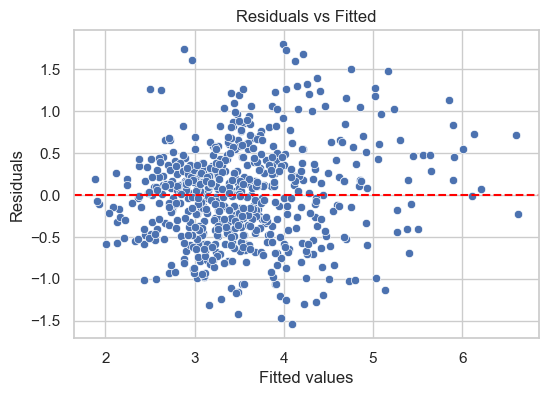

Breusch-Pagan test could not be performed: name 'het_breuschpagan' is not defined


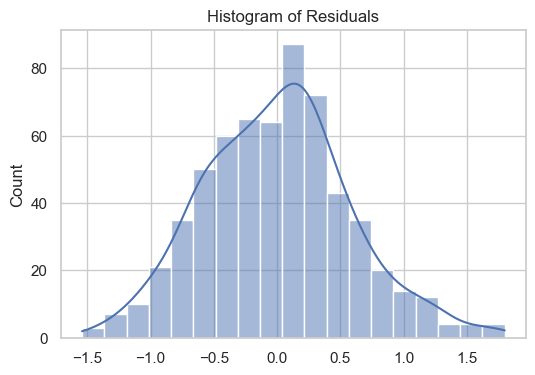

Shapiro-Wilk test for residuals: stat=0.994, p=0.023
Residuals NOT Gaussian (reject H0)
D'Agostino-Pearson test for residuals: stat=5.680, p=0.058


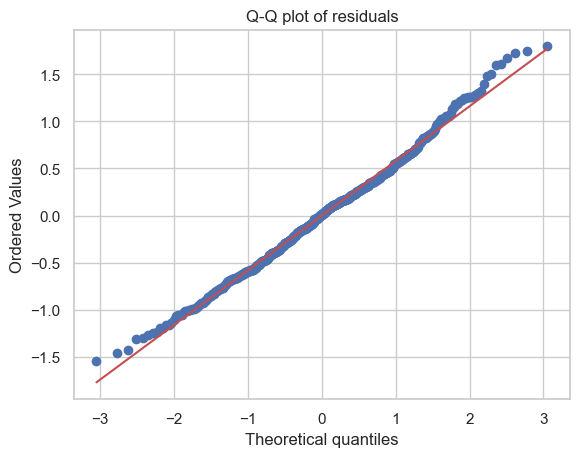

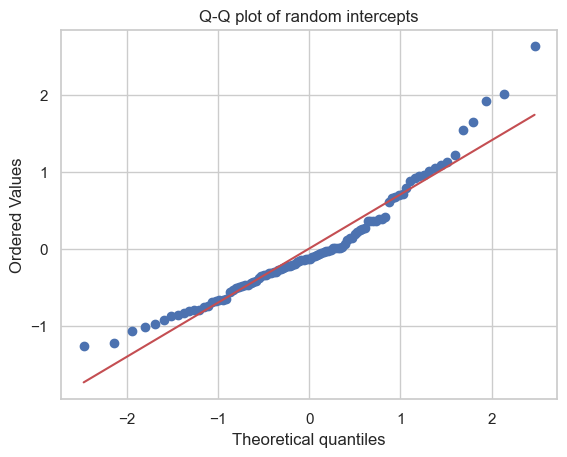

Shapiro-Wilk test for random intercepts: stat=0.938, p=0.000
Random intercepts NOT Gaussian


In [12]:
"""
Check model assumptions. 
Function (assumptions) parameters: 
    - df: Relevant Dataframe. 
    - DVs: List of dependent variables to check.
        - 'headRel_ed_vel_REC', 'headRel_ed_vel_DET', 'headRel_ed_vel_MAXLINE', 'headRel_ed_vel_LAM', 'headRel_ed_vel_ENTROPY'
        - 'body_ed_vel_REC', 'body_ed_vel_DET', 'body_ed_vel_MAXLINE', 'body_ed_vel_LAM', 'body_ed_vel_ENTROPY'
    - formula: Relevant formula used in LMM.

Outputs:
    - Generates diagnostic plots of normality and homoscedasticity.
"""

assumptions(df=df, DVs=['headRel_ed_vel_REC'], formula= "~ avg_percomm_c * avg_sat_c * C(trial) * C(pair, Treatment(reference='pseudo'))")

Descriptive statistics per trial:
    trial      Mean        SD    N
0  trial0  3.856208  1.053912  102
1  trial1  3.452084  0.954680  102
2  trial2  3.282940  0.955244  101


C:\Users\Cathy\AppData\Local\Temp\ipykernel_62304\983938644.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_summary = df.groupby(['couple', 'trial'])[dv_cols].mean().reset_index()
C:\Users\Cathy\AppData\Local\Temp\ipykernel_62304\983938644.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc = df_summary.groupby([trial_col])[value_col].agg(['mean','std','count']).reset_index()
C:\Users\Cathy\AppData\Local\Temp\ipykernel_62304\983938644.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

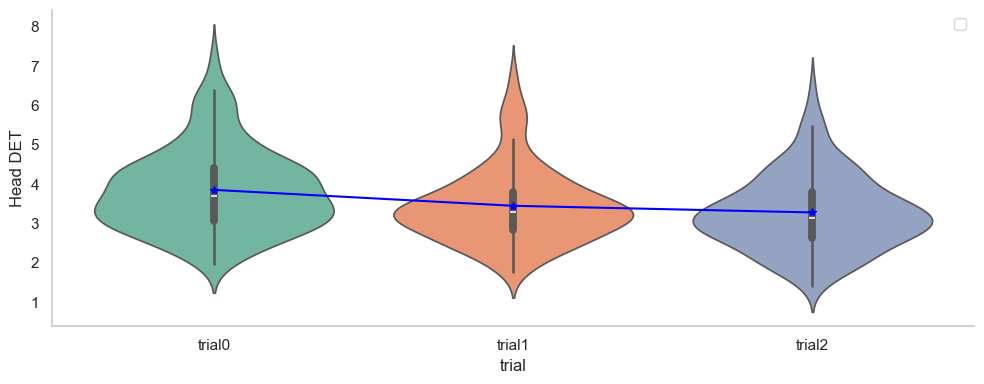

In [13]:
def plot_rqa_violin(
    df,
    trial_col,
    value_col,
    print_stats=False,
    value_label="DV",
    figsize=(12,6)  # expanded figure size
):
    """
    Violin plot of RQA metric per trial with box in the center and mean signal.

    Parameters:
    - df: pandas DataFrame containing trial_col and value_col
    - trial_col: column indicating trials
    - value_col: metric column to plot
    - print_stats: whether to print descriptive statistics
    - figsize: tuple to expand figure size
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    # Compute descriptive statistics per trial
    df_summary = df.groupby(['couple', 'trial'])[dv_cols].mean().reset_index()
    desc = df_summary.groupby([trial_col])[value_col].agg(['mean','std','count']).reset_index()

    if print_stats:
        print("Descriptive statistics per trial:")
        print(desc.rename(columns={'mean':'Mean','std':'SD','count':'N'}))

    plt.figure(figsize=figsize)

    # Violin plot with box in the center
    sns.violinplot(
        x=trial_col,
        y=value_col,
        data=df,
        inner='box',
        palette='Set2'
    )

    sns.despine(top=True, right=True)

    # Overlay mean as a red line
    trial_order = sorted(df[trial_col].unique())
    means = desc.set_index(trial_col).loc[trial_order, 'mean'].values
    plt.plot(range(len(trial_order)), means, '-*', color='blue')

    #plt.xlabel('Trial')
    plt.ylabel(f"{value_label}")
    #plt.title(f'{value_col} across trials')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()



plot_rqa_violin(
    df=df,
    trial_col='trial',
    value_col='headRel_ed_vel_REC',
    value_label='Head DET',
    print_stats=True,
    figsize=(10,4)
)


Descriptive stats for :
             Mean       SEM  N couples
trial                                 
trial0  16.897722  0.766625        112
trial1  15.276542  0.676558        112
trial2  13.985053  0.608698        111


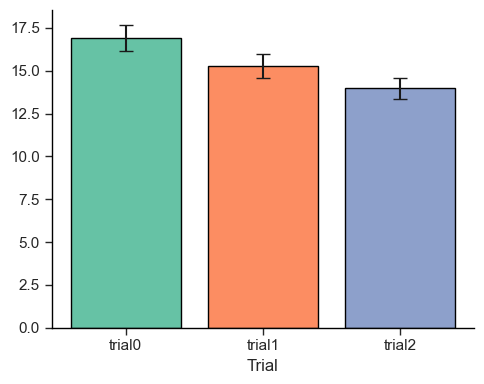

In [14]:
def plot_bar(
    df,
    trial_col,
    couple_col,
    dv,
    dv_label=None,
    figsize=(5,4),
    print_stats=False,
    trial_labels=None  
):
    """
    Bar plot for one DV:
    X-axis = trials (renamable).
    Bars = mean across couples (collapsed across windows).
    Error bars = SEM.
    Each trial has a different color.
    """

    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    if dv_label is None:
        dv_label = dv

    # 1. Collapse across windows within couple × trial
    df_collapsed = df.groupby([couple_col, trial_col])[dv].mean().reset_index()

    # 2. Compute trial-level mean, SEM, N
    trial_stats = df_collapsed.groupby(trial_col)[dv].agg(['mean','std','count'])
    trial_stats['sem'] = trial_stats['std'] / np.sqrt(trial_stats['count'])

    if print_stats:
        print(f"\nDescriptive stats for {dv_label}:")
        print(trial_stats[['mean','sem','count']].rename(
            columns={'mean':'Mean','sem':'SEM','count':'N couples'}
        ))

    # 3. Plot
    fig, ax = plt.subplots(figsize=figsize)

    # Remove grid
    ax.grid(False)

    colors = plt.cm.Set2.colors
    trial_codes = trial_stats.index.tolist()

    # bar positions
    x = np.arange(len(trial_codes))

    ax.bar(
        x,
        trial_stats['mean'],
        yerr=trial_stats['sem'],
        capsize=5,
        color=[colors[i % len(colors)] for i in range(len(trial_codes))],
        edgecolor='black',
        linewidth=1
    )
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color("black")
        spine.set_linewidth(1)

    # rename ticks if mapping provided
    if trial_labels is not None:
        tick_labels = [trial_labels.get(code, str(code)) for code in trial_codes]
    else:
        tick_labels = [str(code) for code in trial_codes]

    ax.set_xticks(x)
    ax.set_xticklabels(tick_labels)

    ax.set_ylabel(dv_label)
    ax.set_xlabel("Trial")

    # Clean aesthetic: only left & bottom spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(
    axis='both',
    which='both',
    bottom=True,
    left=True,
    top=False,
    right=False,
    length=5,      # length of tick marks
    width=1     # thickness of tick marks
)

    plt.tight_layout()
    plt.show()



plot_bar(
    df=actual_coll,
    trial_col='trial',
    couple_col='couple',
    dv='body_ed_vel_DET',
    dv_label='',
    trial_labels={1: "Casual", 2: "Problem 1", 3: "Problem 2"},
    print_stats=True
)